In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
sns.set_style("darkgrid")
df=pd.read_csv("Data.csv")

In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###### data is clean


##### Exploring each Feature "Age"


In [7]:
fig=px.histogram(data_frame=df,x="age",marginal="box")
fig.update_layout(bargap=0.25)

The distribution of clients across all age groups is somewhat similar, with a slight increase in the 18-19 age group. This is likely due to the insurance policies available to young adults in the USA.
 

##### Exploring each Feature "Sex"


In [8]:
temp=pd.DataFrame(df["sex"].value_counts()).reset_index()
px.pie(temp,names="sex",values="count",title="The percentage of males and females").update_layout(title_x=0.5)

There is no significant difference in the representation of both sexes in this dataset.



##### Exploring each Feature "BMI"

In [9]:
fig=px.histogram(data_frame=df,x="bmi",marginal="box")
fig.update_layout(bargap=0.25)

It's definitely normally distributed. with some outliers.

In [10]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25.0 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'
df["bmi_class"]=df["bmi"].apply(classify_bmi)

##### Exploring each Feature "childern"

In [11]:
temp=pd.DataFrame(df["children"].value_counts()).reset_index()
px.pie(temp,names="children",values="count",title="The proportion of children number",labels="children").update_layout(title_x=0.5)

Approximately 43% of people in this data do not have children, representing the largest percentage of the group.

##### Exploring each Feature "Smoker"

In [12]:
temp=pd.DataFrame(df["smoker"].value_counts()).reset_index()
px.pie(data_frame=temp,values="count",names="smoker",title="The proportion of smoker and non-smoker",).update_layout(title_x=0.5)

Approximately one-third of the individuals in this dataset are smokers.

##### Exploring each Feature "region"

In [13]:
temp=pd.DataFrame(df["region"].value_counts()).reset_index()
px.pie(data_frame=temp,values="count",names="region",title="The representation of each region in the data",).update_layout(title_x=0.5)

Approximately all regions have an equal share of individuals.

##### Exploring each Feature "charges"

In [14]:
fig=px.histogram(data_frame=df,x="charges",marginal="box")
fig.update_layout(bargap=0.25)

In [15]:
px.box(data_frame=df,x="charges")

It seems there are many outliers in the medical charges.

##### Over look of cahgres and other varibles


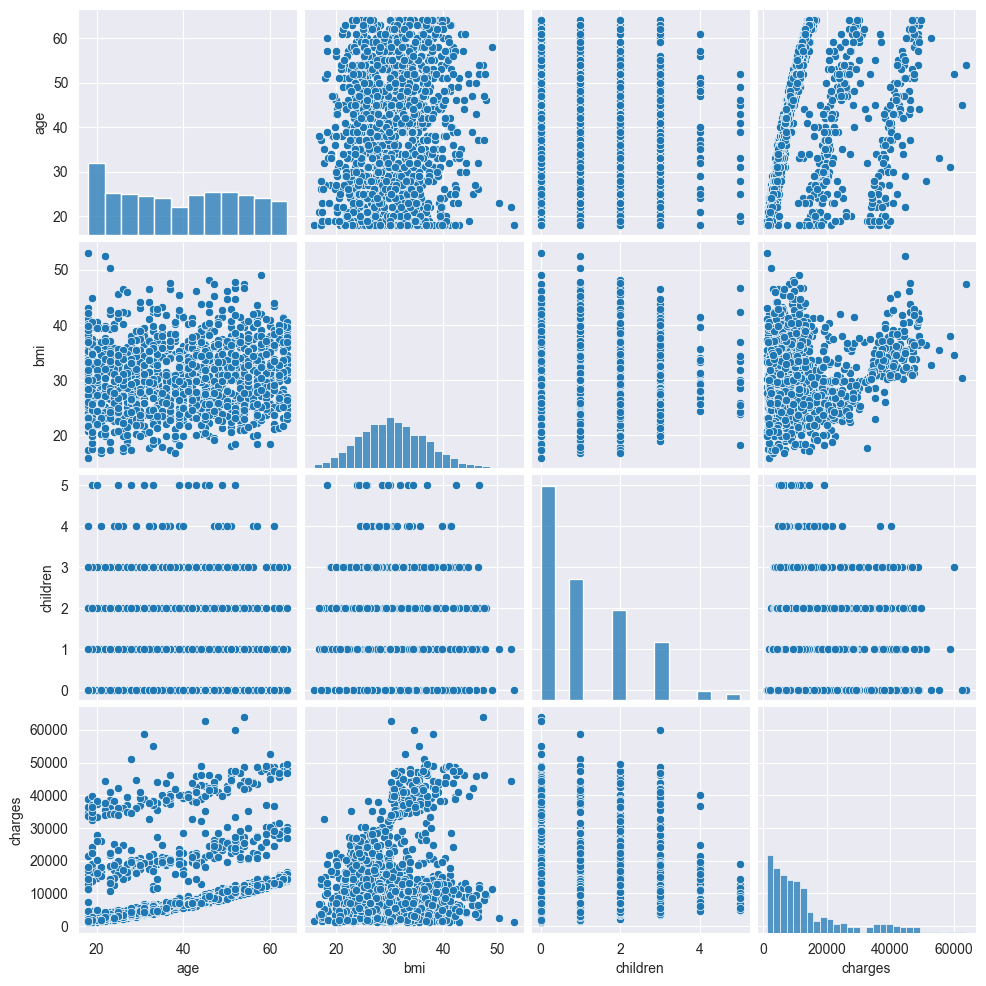

In [16]:
sns.pairplot(df)

In [17]:
#temp_copy
ddf=df.copy()
ddf["region"]=df["region"].map({
    'southwest': 0,
    'southeast': 2,
    'northwest': 3,
    'northeast': 4})
mapped_values_smoking = ddf["smoker"].map({"yes": 1, "no": 0})
mapped_values_sex=ddf["sex"].map({"male": 1, "female": 0})

In [18]:
# because map fucntion wroks with only two valus 
# it needs to be separted otherwise it will assian NaN values 
ddf.smoker=mapped_values_smoking
ddf.sex=mapped_values_sex
ddf

,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,0,27.900,0,1,0,16884.92400,Overweight
1,18,1,33.770,1,0,2,1725.55230,Obesity
2,28,1,33.000,3,0,2,4449.46200,Obesity
3,33,1,22.705,0,0,3,21984.47061,Normal weight
4,32,1,28.880,0,0,3,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830,Obesity
1334,18,0,31.920,0,0,4,2205.98080,Obesity
1335,18,0,36.850,0,0,2,1629.83350,Obesity
1336,21,0,25.800,0,0,0,2007.94500,Overweight


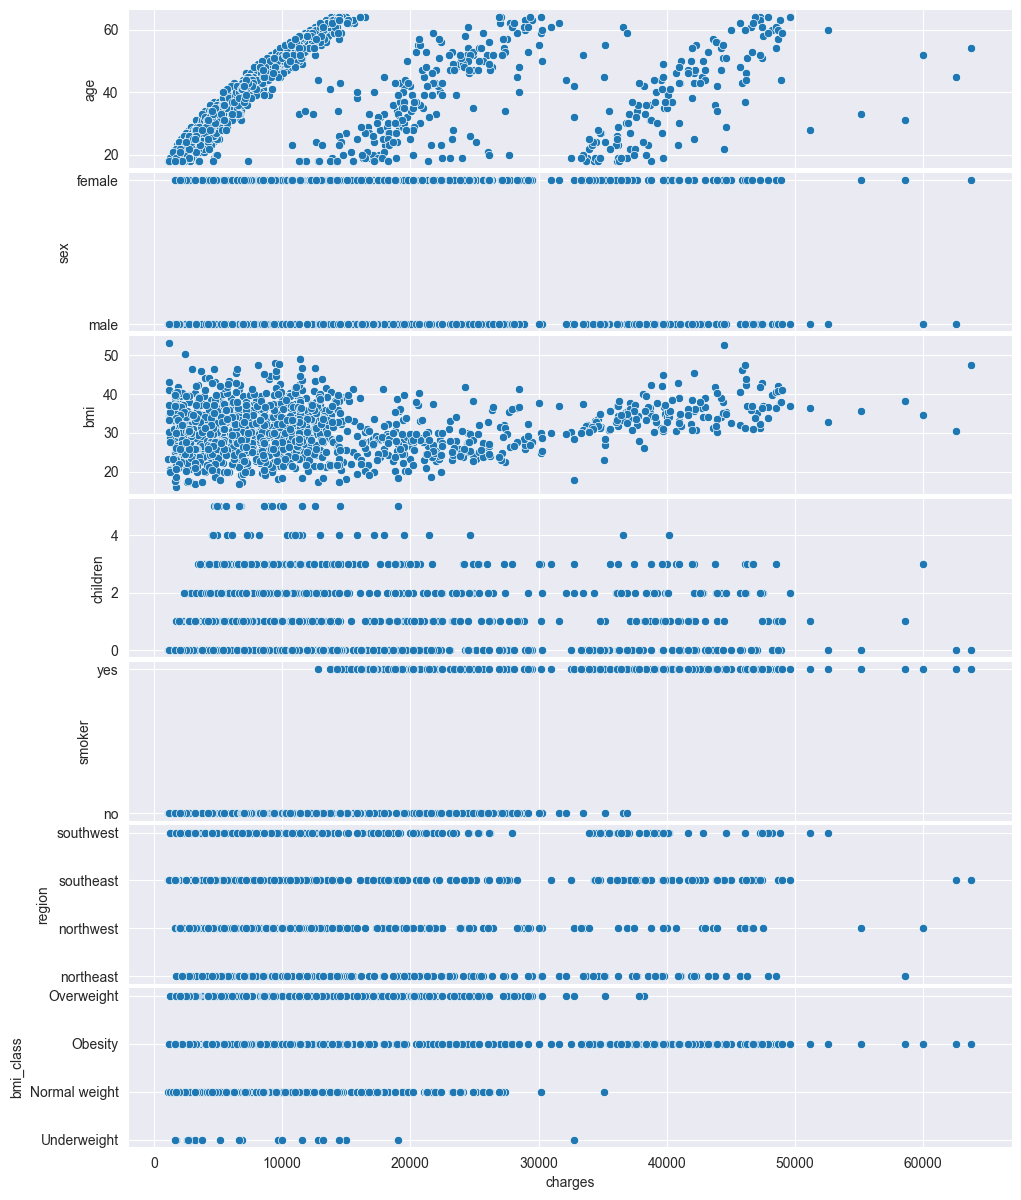

In [19]:
# focusing only on charges rlation to all other varibles
other_columns = [col for col in ddf.columns if col != 'charges']
fig=sns.pairplot(df, x_vars='charges', y_vars=other_columns)
fig.figure.set_size_inches(20,12)


##### Exoloring some relations (charges between smokers and non-smokers)

In [20]:
fig=px.histogram(data_frame=df,x="charges",color="smoker",marginal="box",title="The distribution of charges across smoking status")
fig.update_layout(bargap=.25,title_x=.5)

In [21]:
px.box(data_frame=df,x="charges",color="smoker")

It's clear that smokers generally have higher charges, while non-smokers may exhibit some outliers, although we have only 20.5% of our data are smoker

##### Exoloring some relations (charges between across number of childern)

In [22]:
fig=px.histogram(data_frame=df,x="children",y="charges")
fig.update_layout(bargap=0.25)

As previously noted, approximately 43% of individuals in the dataset do not have children. This may contribute to a higher total charge for this group.

In [23]:
for i in range (1,df["children"].max()+1):
    fig=px.histogram(data_frame=df.loc[df["children"]==i],x="charges",marginal="box",title=f"The distribution of charges among individuals with {i} children")
    fig.update_layout(bargap=0.25,title_x=0.5)
    fig.show()

In [24]:
px.violin(data_frame=df,x=["children"],y="charges")

1- It appears that individuals with more children tend to have fewer outliers in their medical charges. However, this might be due to a non-representative sample, as we may not have an equal distribution of individuals with different numbers of children.

2- There is a weak relation  between the number of children and medical charges, likely due to unrepresentative data.

##### Exoloring some relations (charges among the 4 differnt regions)


In [25]:
fig=px.histogram(data_frame=df,x="charges",color="region",marginal="box",title="The distribution of charges across different regions",)
fig.update_layout(bargap=.25,title_x=.5)

The distribution and outliers of medical charges are relatively similar across different regions

##### Exoloring some relations (charges and sex)


In [26]:
fig=px.histogram(data_frame=df,x="charges",color="sex",marginal="box",title="The gender-based distribution of charges",)
fig.update_layout(bargap=.25,title_x=.5)

Females may exhibit more outliers in medical charges, while males may have higher overall charges. This could be attributed to factors such as differences in health risks between genders.

##### Exoloring some relations (sex and smoker)


In [27]:
px.histogram(data_frame=df,x="sex",color="smoker",title="The total number of smokers, categorized by gender").update_layout(title_x=0.5)

Males tend to smoke more than females

##### Exoloring some relations (charges and Age )


In [28]:
px.scatter(data_frame=df,x="age",y="charges",color="smoker",title="The relationship between charges, age, and smoking habits").update_layout(title_x=0.5)

It's evident that medical expenses generally increase with age, regardless of smoking status. However, smokers tend to have higher overall medical expenses. 
we have 3 clusters the first one is the smoker and the thir one is non-smoker but the middle cluster have a mixed expenses it may becasue of the accidents or the bmi which we will look for know

In [29]:
px.scatter(data_frame=df,x="age",y="charges",color="bmi_class",title="The relationship between charges, age,and BMI").update_layout(title_x=0.5)

It appears that individuals with higher BMIs, indicating a greater level of obesity, tend to have higher medical expenses regerdless of the age

##### Exoloring some relations (charges and BMI )


In [30]:
px.scatter(data_frame=df,x="bmi",y="charges",color="smoker",title="The relationship between BMI and Charges").update_layout(title_x=0.5)

Individuals with higher BMIs and who are smokers tend to have higher medical expenditures. unlike who are not smoker 

In [31]:
px.scatter(data_frame=df,x="bmi",y="charges",color="bmi_class",title="The relationship between BMI and Charges").update_layout(title_x=0.5)

##### Exoloring some relations (charges , smoking and BMI )


In [32]:
non_smoker=df.loc[(df["smoker"]=="no")]
smoker=df.loc[(df["smoker"]=="yes")]

px.histogram(data_frame=smoker,x="charges",marginal="box",color="bmi_class",title="The relationship between smoker and Obeseity").update_layout(bargap=0.5)


In [33]:
px.histogram(data_frame=non_smoker,x="charges",marginal="box",color="bmi_class",title="The relationship between non-smoker and Obeseity").update_layout(bargap=0.5)


It's evident that obese smokers have a higher risk of elevated medical expenditures. This is likely due to the combined impact of obesity and smoking, two significant health risk factors.


##### correlation overlook

In [34]:
corr_matrix=ddf.corr(numeric_only=True)
corr_matrix

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.004559,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.002246,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.117561,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.019001,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.012521,0.787251
region,-0.004559,-0.002246,-0.117561,-0.019001,0.012521,1.000000,0.017416
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.017416,1.000000


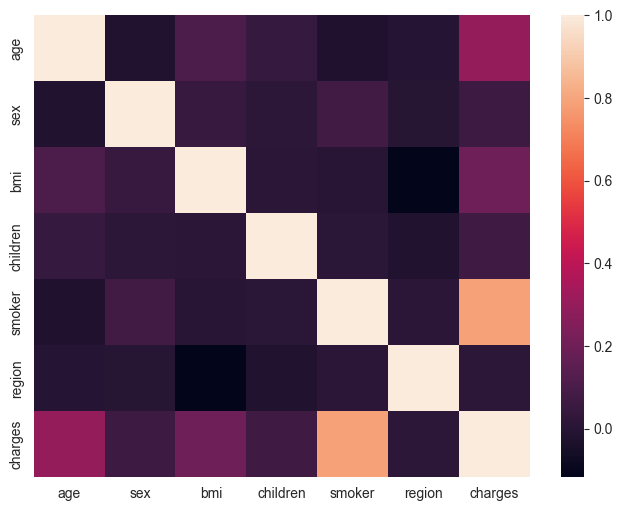

In [35]:
fig=sns.heatmap(corr_matrix)
fig.figure.set_size_inches(8,6)

As we already explored in the (EDA) phase

There appears to be a weak correlation between the number of children and medical charges. However, this finding might not be reliable due to limited and potentially non-representative data, which may not be sufficient for accurate model training. In contrast, there is a stronger correlation observed between medical charges and age, smoking status, and BMI.